# System building

## Import modules

In [1]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

import model_openface as mo ## helper module for model build
import helper_module as hm ## helper module with custom functions
import cv2 ## openCV
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
original_path = os.getcwd()

Using TensorFlow backend.


## Build a predefined model/weights for face embedding ([OpenFace](https://github.com/iwantooxxoox/Keras-OpenFace))
This may take some time..

In [2]:
model = mo.model_openface()
mo.load_weight_openface(model)

## Hyperparams
If the euclidian distance between faces is <= `face_recog_thresh`, recognize them as the same face. If not, as n/a. 

In [3]:
face_recog_thresh = 0.75

## Testing on images: what is going to be embedded?
To build a reliable face database, it is important to consider:
* input image needs to contain only a single frontal-looking face
* use `flag='db'` in `detect_face()` --> process images in the gray scale to increase the face detection accuracy


**Only the face** is cropped to be embedded. 

In [4]:
testing_img_sean = cv2.imread('sean.jpg')
testing_img_sean = cv2.resize(testing_img_sean,(550,750),interpolation=cv2.INTER_AREA)

[[177, 139, 200, 200]]

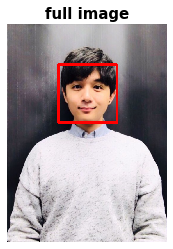

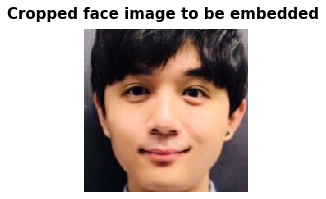

In [5]:
hm.detect_face(testing_img_sean,flag='db',plot=True)

## Database embedding
* If you are using the prepared Insight embeddings, simply load the provided **'insight_embedding.pkl'**.
* If you want to create your own embedding database, CREATE a folder named 'image_database' and place your database images there.

In [6]:
####################################################
##### ONLY RUN THIS CELL TO CREATE YOUR OWN DB #####
####################################################

saving_file_name = 'insight_embedding'
database_embeddings = hm.database_face_embedding(model)
registered_name = list(database_embeddings.keys())
print('Current database contains {} images: \n{}'.format(len(database_embeddings),[key.upper() for key in registered_name]))
## save embeddings
pickle.dump(database_embeddings,open(saving_file_name+'.pkl','wb'))

Current database contains 17 images: 
['SOPHIE', 'JAD', 'KEN', 'ZOHREH', 'SERGIO', 'ISSAC', 'SARFO', 'LISA', 'PATRICK', 'MINA', 'DEN', 'YIMENG', 'AMANDA', 'CHENG', 'SEAN', 'JEFF', 'LIWEI']


In [7]:
## load embeddings
database_embeddings = pickle.load(open(saving_file_name+'.pkl','rb'))

## Model validation

For validation, used the identical picture stored in the database --> 0 distance from *SEAN* **(model confirmed!)**

About the wrongly-detected blue bounding boxes:
* This problem is partially because `recog_face` uses `detect_face(flag='new')` --> RGB images are fed.
* This issue was mainly caused by the performance of OpenCV's `face_cascade.detectMultiScale()`. A better face detection algorithm will solve this problem.
* `helper_module.py` can be customized not to display these wrongly detected bounding boxes.

<span style='color:red'>@@@ this is **SEAN**! @@@
</span>

Distance from:


<span style='color:red'>**('sean', 0.0)**</span>

('den', 0.552)
('ken', 0.553)
('sophie', 0.56)
('mina', 0.606)
('cheng', 0.616)
('issac', 0.62)
('yimeng', 0.667)
('amanda', 0.807)
('lisa', 0.809)
('jeff', 0.813)
('sergio', 0.838)
('patrick', 0.914)
('jad', 0.953)
('zohreh', 0.958)
('liwei', 0.966)
('sarfo', 1.284)

@@@ not registered! @@@

Distance from:
('jeff', 1.157)
('ken', 1.252)
('liwei', 1.258)
('issac', 1.26)
('mina', 1.266)
('sergio', 1.273)
('den', 1.297)
('amanda', 1.314)
('sophie', 1.349)
('sarfo', 1.365)
('yimeng', 1.365)
('patrick', 1.366)
('sean', 1.366)
('zohreh', 1.385)
('jad', 1.391)
('lisa', 1.401)
('cheng', 1.421)



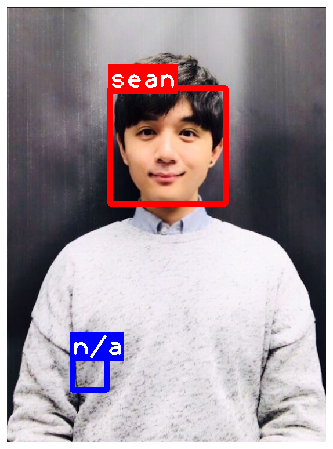

In [8]:
hm.recog_face(testing_img_sean,database_embeddings,model,face_recog_thresh=face_recog_thresh,verbose=True)

## Face recognition testing on new images!
Place your own testing images in the 'test' folder!

In [9]:
testing_file_name = 'sean.jpeg'
test_img = hm.load_test_img(testing_file_name)

<span style='color:red'>@@@ this is **SEAN**! @@@
</span>

Distance from:


<span style='color:red'>**('sean', 0.707)**</span>

('mina', 0.87)
('cheng', 0.881)
('ken', 0.912)
('issac', 0.924)
('den', 0.931)
('yimeng', 0.989)
('jeff', 0.991)
('amanda', 1.011)
('lisa', 1.045)
('sophie', 1.052)
('sergio', 1.075)
('jad', 1.162)
('patrick', 1.174)
('zohreh', 1.179)
('liwei', 1.219)
('sarfo', 1.338)



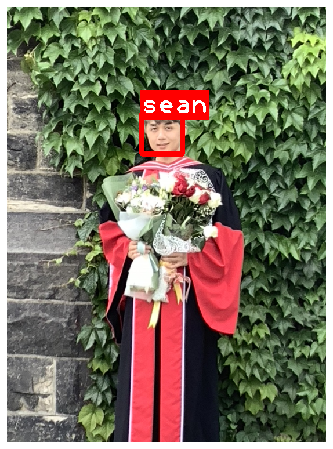

In [10]:
hm.recog_face(test_img,database_embeddings,model,face_recog_thresh=face_recog_thresh,verbose=True)